In [1]:
!nvidia-smi

Tue Nov 26 16:12:32 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
%cd drive/My Drive/
!ls

/content/drive/My Drive
 1406.2661.pdf
 1543505963573-1011029217.doc.gdoc
'4. PW1 - Synopsis Review_Sample PPT.gslides'
'4. PW1 - Synopsis Review_Sample PPT.pptx'
 AME.gdoc
'AME SELF STUDY_final.gdoc'
'AME SELF STUDY.gdoc'
 application_130769_21032016_202206.pdf
 approx_kd_tree_with_similarity.ipynb
'Artificial Intelligence'
'A theory of how columns in the neocortex enable learning the structure of the world.gdoc'
'AUTOMATIC CAMERA CALIBRATION.gdoc'
 behaviour_cloning.ipynb
'BEHAVIOUR CLONING: LEARNING FROM HUMANS.gslides'
'Blitzstein Hwang Probability.pdf'
 Bookmarks.gsheet
'BUILDING MACHINES THAT LEARN AND THINK LIKE PEOPLE.gdoc'
'CCN_Signal_Identification_final(Bigdata).ipynb'
 centers_list.npy
 Certificates
'Class A transformer coupled-1.gdoc'
 Classroom
 Cluster_Million_Images
'Colab Notebooks'
'Copy of 3rd HandsOn Part 0.ipynb'
 Copy_of_Ensembling_CNN.ipynb
'Copy of Facial Keypoints Detection(Synopsis review).gdoc'
'Copy of Handson3.ipynb'
'Copy of Report.gdoc'
'Copy of Resume_co

In [6]:
import os
print(os.listdir("facial-keypoints-detection"))

['SampleSubmission.csv', 'IdLookupTable.csv', 'training.zip', 'training.csv', 'test.csv', 'test.zip']


In [0]:
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

FTRAIN = 'facial-keypoints-detection/training.csv'
FTEST = 'facial-keypoints-detection/test.csv'

In [9]:
import numpy as np

def load(test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y


X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [0]:
def load2d(test=False,cols=None):

    re = load(test, cols)
    
    X = re[0].reshape(-1,96,96,1)
    y = re[1]

    return X, y

In [21]:
X, y = load2d()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

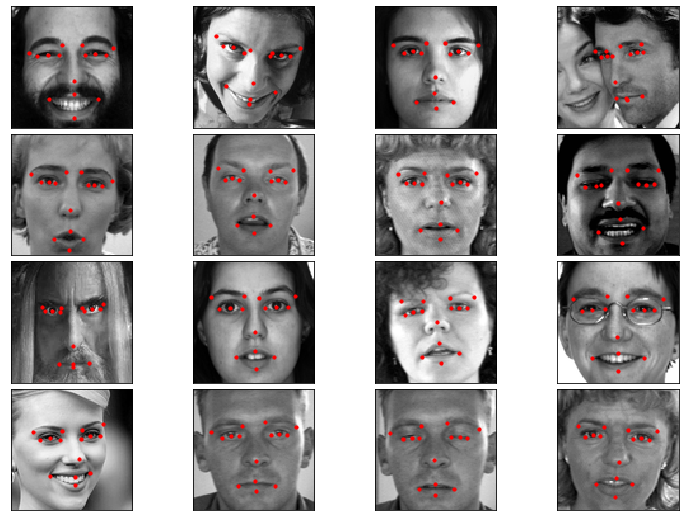

In [31]:
import matplotlib.pyplot as plt

def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='o', s=10, c='red')

fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X[i], y[i], axis)

plt.show()

In [32]:
print(X.shape, y.shape)

(2140, 96, 96, 1) (2140, 30)


## Convolution Neural Network

In [36]:
%%time
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import MaxPooling2D, Conv2D , Flatten, Dropout
from keras.layers.normalization import BatchNormalization

CPU times: user 23 µs, sys: 3 µs, total: 26 µs
Wall time: 30 µs


In [0]:
def CNN():
    model = Sequential()

    model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(96,96,1)))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
    model.add(BatchNormalization())

    model.add(Conv2D(32, 5, 5,activation="relu"))
    # model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, 5, 5,activation="relu"))
    # model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
    model.add(BatchNormalization())

    model.add(Conv2D(128, 3, 3,activation="relu"))
    # model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.1))

    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.1))

    model.add(Dense(30))


    model.summary()
    model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae','accuracy'])
    return(model)

In [38]:
model2 = CNN()
hist2 = model2.fit(X, y, nb_epoch=50,batch_size=128, validation_split=0.2)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activati

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 16)        80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  




Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 6s 3ms/step - loss: 0.2844 - mean_absolute_error: 0.3790 - acc: 0.2699 - val_loss: 0.0544 - val_mean_absolute_error: 0.1821 - val_acc: 0.6519
Epoch 2/50
1712/1712 [==============================] - 1s 634us/step - loss: 0.0669 - mean_absolute_error: 0.2040 - acc: 0.4971 - val_loss: 0.0341 - val_mean_absolute_error: 0.1446 - val_acc: 0.6939
Epoch 3/50
1712/1712 [==============================] - 1s 634us/step - loss: 0.0479 - mean_absolute_error: 0.1708 - acc: 0.4965 - val_loss: 0.0182 - val_mean_absolute_error: 0.1014 - val_acc: 0.6893
Epoch 4/50
1712/1712 [==============================] - 1s 632us/step - loss: 0.0351 - mean_absolute_error: 0.1446 - acc: 0.4965 - val_loss: 0.0136 - val_mean_absolute_error: 0.0898 - val_acc: 0.6776
Epoch 5/50
1712/1712 [==============================] - 1s 646us/step - loss: 0.0276 - mean_absolute_error: 0.1276 - acc: 0.4784 - val_loss: 0.0182 - val

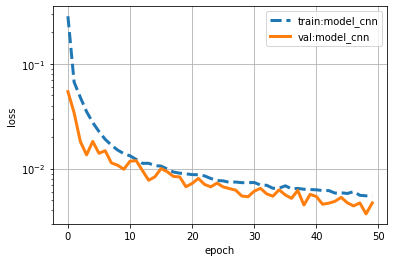

In [39]:
def plot_loss(hist,name,plt,RMSE_TF=False):
    '''
    RMSE_TF: if True, then RMSE is plotted with original scale 
    '''
    loss = hist['loss']
    val_loss = hist['val_loss']
    if RMSE_TF:
        loss = np.sqrt(np.array(loss))*48 
        val_loss = np.sqrt(np.array(val_loss))*48 
        
    plt.plot(loss,"--",linewidth=3,label="train:"+name)
    plt.plot(val_loss,linewidth=3,label="val:"+name)

plot_loss(hist2.history,"model_cnn",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [0]:
from keras.models import load_model
model2.save('facial-keypoints-detection/model_cnn.h5') 

model = load_model('facial-keypoints-detection/model_cnn.h5')

In [43]:
X_test, _ = load2d(test=True)
y_test = model.predict(X_test)

ImageId    1783
Image      1783
dtype: int64


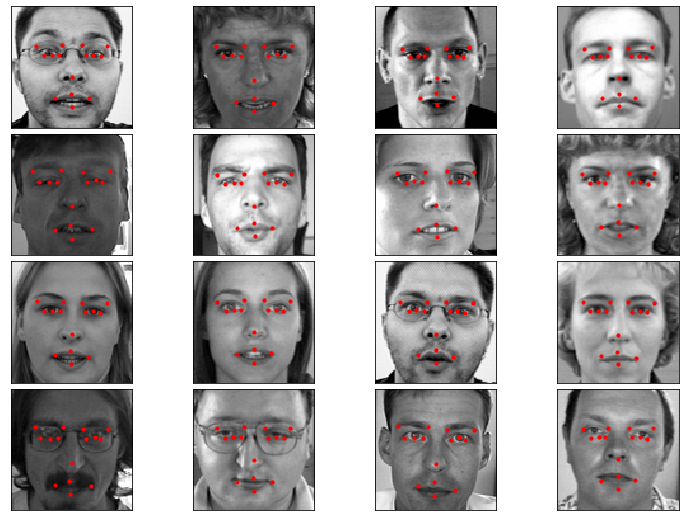

In [44]:
import matplotlib.pyplot as plt

def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='o', s=10, c='red')

fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_test[i], axis)

plt.show()